# Loading Data Set

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(372450, 785)

# Data Analysis

In [4]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [6]:
df.rename(columns={'0':'output'}, inplace=True)

In [7]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',
             12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',
             22:'W',23:'X', 24:'Y',25:'Z'}

In [8]:
df['output'].value_counts()

output
14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: count, dtype: int64

In [9]:
X = df.drop(columns=['output'])
y = df['output']

In [13]:
y = y.astype(int)

# Data Visualization

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
alphabet_counts = y.value_counts().sort_index()


In [12]:
alphabet_counts.index = alphabet_counts.index.map(word_dict)

C:\Users\SASI REKHA\AppData\Local\Temp\ipykernel_19084\2387498537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alphabet_counts.index, y=alphabet_counts.values, palette='viridis')


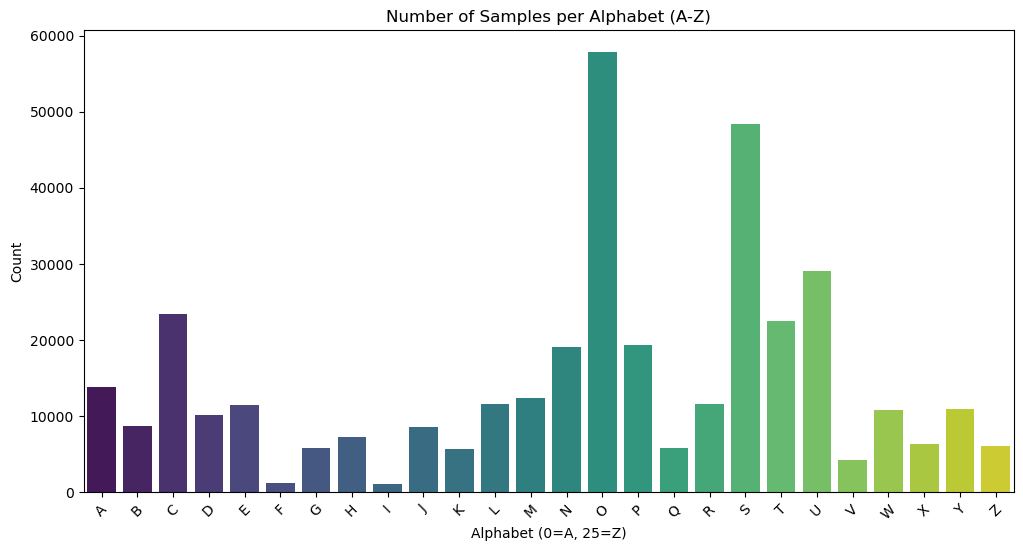

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=alphabet_counts.index, y=alphabet_counts.values, palette='viridis')
plt.title("Number of Samples per Alphabet (A-Z)")
plt.xlabel("Alphabet (0=A, 25=Z)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

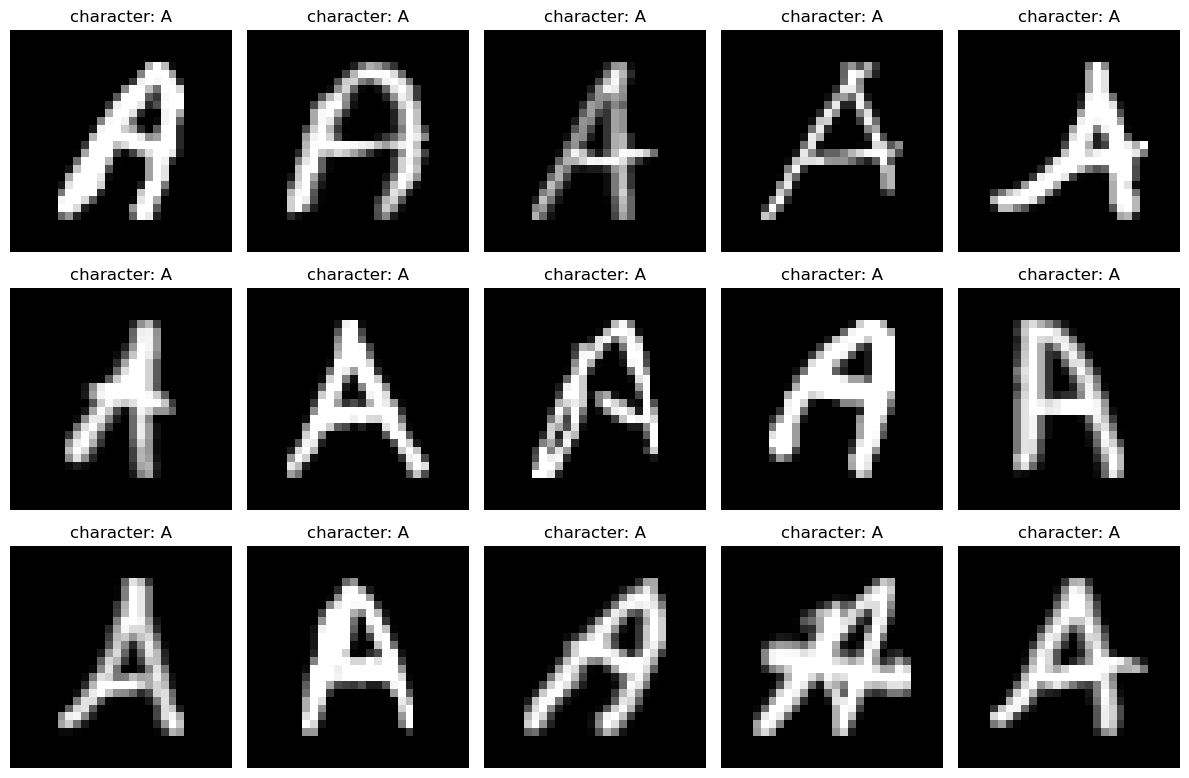

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    img = X.iloc[i].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"character: {chr(65 + int(y[i]))}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Machine Learning Model Training

In [15]:
from sklearn.model_selection import train_test_split

# Preprocessing Data

In [16]:
X = X / 255.0

# Splitting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (297960, 784)
Test data shape: (74490, 784)


# Model Building

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)   

RandomForestClassifier(random_state=42)

# Evaluating Model

In [20]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")

Random Forest Results:
Accuracy: 0.9876


# Classification Report

In [21]:
print(classification_report(y_test, rf_pred, target_names=list(word_dict.values())))

              precision    recall  f1-score   support

           A       0.97      0.99      0.98      2806
           B       0.98      0.98      0.98      1673
           C       0.99      0.99      0.99      4742
           D       0.98      0.96      0.97      2044
           E       0.99      0.98      0.99      2214
           F       1.00      0.94      0.97       231
           G       0.99      0.97      0.98      1183
           H       0.98      0.96      0.97      1466
           I       1.00      0.96      0.98       237
           J       0.98      0.97      0.98      1668
           K       0.98      0.96      0.97      1132
           L       1.00      1.00      1.00      2319
           M       0.98      0.97      0.98      2487
           N       0.98      0.99      0.98      3756
           O       0.99      1.00      0.99     11629
           P       0.99      0.99      0.99      3868
           Q       0.99      0.95      0.97      1159
           R       0.98    

# Visualizing Prediction

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

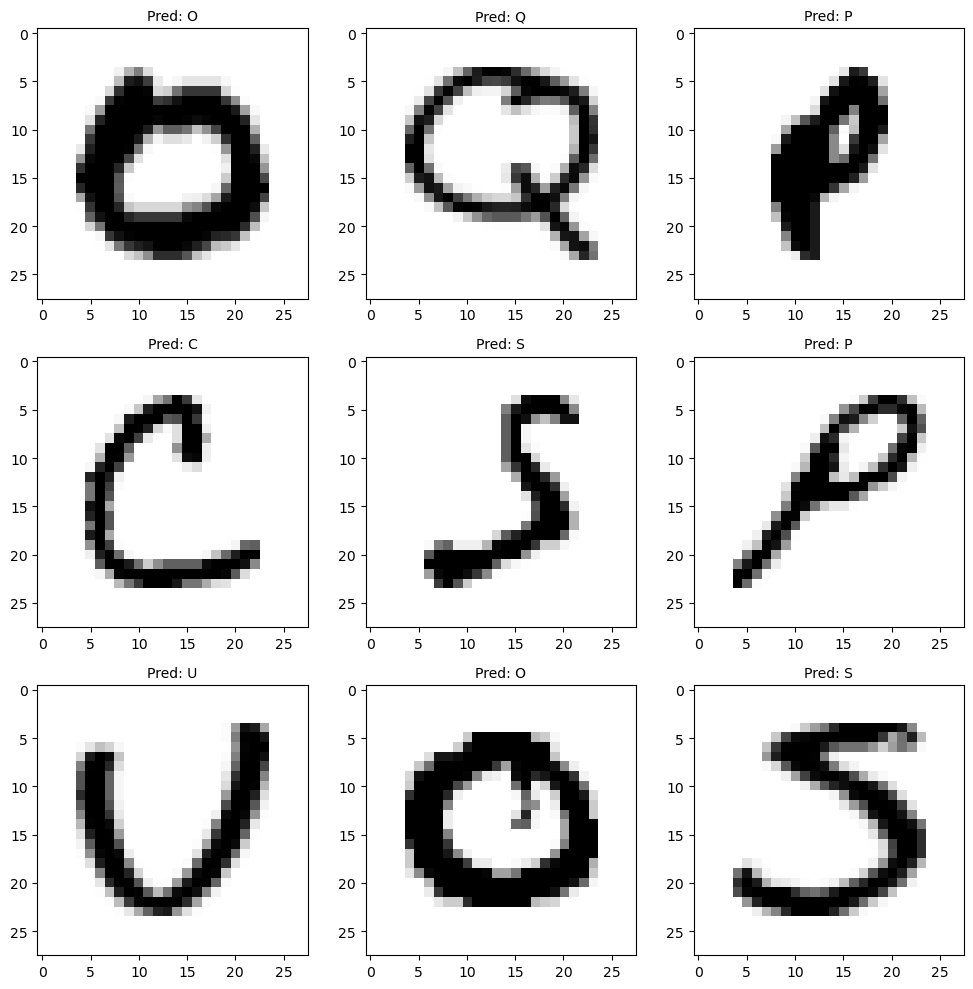

In [22]:
sample_indices = np.random.choice(len(X_test), 9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = X_test.iloc[sample_indices[i]].values.reshape(28, 28)
    true_label = word_dict[y_test.iloc[sample_indices[i]]]

    rf_pred = word_dict[rf_model.predict([X_test.iloc[sample_indices[i]]])[0]]

    ax.imshow(img, cmap='Greys')
    ax.set_title(f"Pred: {rf_pred}", fontsize=10)

plt.tight_layout()
plt.show()

# Exporting Our ML model

It looks like you’re referring to a file named random_forest_az_handwritten.joblib, which is likely a saved Random Forest model (probably trained on handwritten character or digit data) using joblib in Python.

. joblib.load() is the correct way to load .joblib files saved with joblib.dump().

. The input shape to predict() must match what the model was trained on.
    
. If this is for handwritten characters (like A–Z), the output will likely be a letter index (e.g., 0 for 'A', 1 for 'B', etc.).

In [23]:
from joblib import dump

dump(rf_model, 'random_forest_az_handwritten.joblib', compress=3)

['random_forest_az_handwritten.joblib']

In [28]:
from google.colab import files
files.download('random_forest_az_handwritten.joblib')

ModuleNotFoundError: No module named 'google.colab'

# Now Using CNN

# CNN- Convolutional Neural Network (CNN) 

          It is a specialized type of deep learning algorithm designed primarily for image recognition and processing tasks. CNNs are particularly effective in handling grid-like data structures, such as images, due to their ability to capture spatial hierarchies in data.

 # TensorFlow is an open-source machine learning framework that uses tensors and computational graphs to build and train neural networks efficiently on CPUs, GPUs, and TPUs.

 Purpose

        Build machine learning models

        Train neural networks

        Perform numerical computations efficiently

It is widely used in:

         Image recognition 📷

         Speech recognition 🎙️

         Natural Language Processing (NLP)

         Recommendation systems

Why is it called TensorFlow?

Tensor:

   A tensor is a multidimensional data structure.

Data	                             TensorType

Single number	                 Scalar (0D tensor)

List Vector                             (1D tensor)

Matrix	                                2D tensor

Images / Videos                    	3D+ tensors

Flow:

   Data flows through a graph of operations

    Each operation transforms tensors

pip install tensorflow

In [1]:
pip install tensorflow

# . layers is used to define neural network layers like Dense, Conv2D, etc.

   Theory

A neural network is made of layers stacked together. Each layer:

        Takes input data

        Applies some mathematical operation

        Passes the result to the next layer

Common layers you’ll use

       Dense → fully connected layer

       Conv2D → convolution layer (images)

       MaxPooling2D → downsampling (images)

       Dropout → prevents overfitting

       Flatten → converts data to 1D
# . Sequential is a model type where layers are stacked in order.

In a Sequential model:

         Data flows one direction

         Each layer’s output goes directly to the next layer

         Best for simple feedforward neural networks

When to use it

       ✔ Simple classification
       ✔ Regression
       ✔ CNNs with a straight pipeline

      ❌ Not good for complex models with multiple inputs/outputs
      
# . to_categorical is used to convert integer labels into one-hot encoded vectors.

         Neural networks don’t understand class numbers like 0, 1, 2.
         They work better with one-hot encoded vectors.

How they work together (big picture)

   1. layers → define the structure

   2.  Sequential → arrange layers in order

   3.  to_categorical → prepare labels for training

Together, they let you:

       Build → organize → train a neural network properly

In [24]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [25]:
X = X.values.reshape(-1, 28, 28, 1)

In [26]:
y = to_categorical(y, num_classes=26)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(26, activation='softmax')
])

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

# Epoch

In machine learning, an epoch refers to a single complete pass through the entire training dataset by the learning algorithm. During this process, the model processes each data sample, calculates the error using a loss function, and updates its internal parameters (such as weights in neural networks) to minimize the error. This iterative process allows the model to learn and improve over time.

Example of an Epoch

If a dataset contains 1,000 samples, one epoch involves processing all 1,000 samples. However, datasets are often divided into smaller subsets called batches to optimize memory usage and computational efficiency. For instance, with a batch size of 100, the dataset would be split into 10 batches, and one epoch would consist of 10 iterations (one iteration per batch).

In [31]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test))

Epoch 1/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 427s 90ms/step - accuracy: 0.9220 - loss: 0.2728 - val_accuracy: 0.9811 - val_loss: 0.0692
Epoch 2/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 242s 52ms/step - accuracy: 0.9671 - loss: 0.1194 - val_accuracy: 0.9845 - val_loss: 0.0561
Epoch 3/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 177s 34ms/step - accuracy: 0.9753 - loss: 0.0900 - val_accuracy: 0.9869 - val_loss: 0.0487
Epoch 4/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 137s 29ms/step - accuracy: 0.9787 - loss: 0.0744 - val_accuracy: 0.9897 - val_loss: 0.0389
Epoch 5/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 140s 30ms/step - accuracy: 0.9817 - loss: 0.0645 - val_accuracy: 0.9899 - val_loss: 0.0386
Epoch 6/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 131s 28ms/step - accuracy: 0.9837 - loss: 0.0569 - val_accuracy: 0.9903 - val_loss: 0.0386
Epoch 7/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - accuracy: 0.9848 - loss: 0.0515 - val_accuracy: 0.9906 - val_loss: 0.0379
Epoch 8/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 149s 32ms/step - accuracy: 

# Visualizing CNN Performance

# Train Accuracy

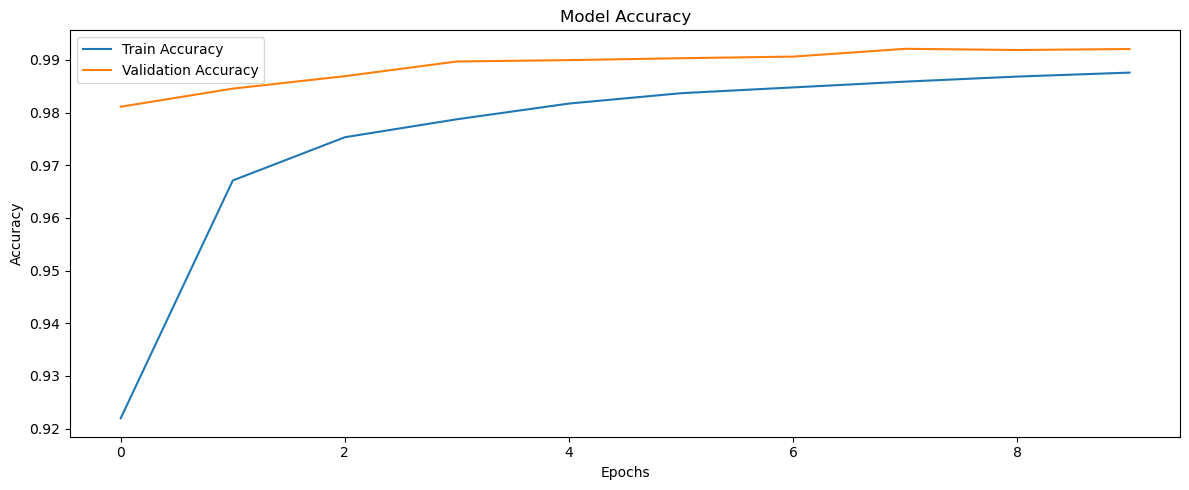

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Train Loss

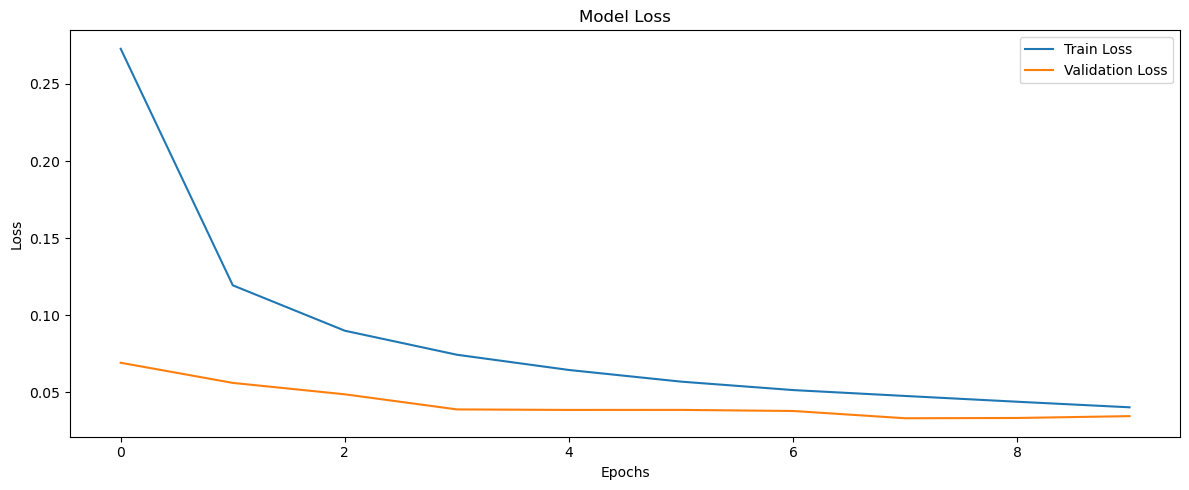

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Exporting CNN Model

In [34]:
model.save("cnn_az_handwritten_model.keras")

In [38]:
from google.colab import files
files.download('cnn_az_handwritten_model.keras')

ModuleNotFoundError: No module named 'google.colab'

# Test On Custom Data

# Using ML Model

# Letter P

PIL stands for Python Imaging Library.

It is a library used to open, manipulate, and save images in Python.

Today, PIL is maintained as Pillow, a modern and improved version of PIL.

In [35]:
from PIL import Image

In [36]:
def preprocess_image_for_model(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = 255 - img_array
    img_array = img_array / 255.0
    img_flattened = img_array.reshape(1, -1)

    return img_flattened, img_array

In [40]:
input_img, original_img = preprocess_image_for_model('logo.jpg')

In [41]:
prediction = rf_model.predict(input_img)[0]


C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
prediction_proba = rf_model.predict_proba(input_img)[0]

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
predicted_letter = word_dict.get(prediction, "Unknown")

In [44]:
print(f"Predicted Letter: {predicted_letter} (Class {prediction})")

Predicted Letter: P (Class 15)


In [45]:
print("\nTop Predictions:")
top_classes = np.argsort(prediction_proba)[::-1][:5]
for class_idx in top_classes:
    letter = word_dict.get(class_idx, "?")
    prob = prediction_proba[class_idx]
    print(f"  {letter} (Class {class_idx}): {prob:.4f}")


Top Predictions:
  P (Class 15): 0.4700
  Y (Class 24): 0.2100
  T (Class 19): 0.0700
  N (Class 13): 0.0400
  H (Class 7): 0.0400


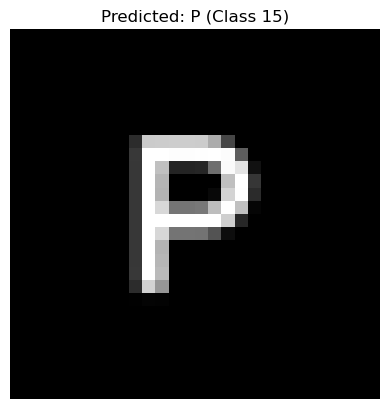

In [46]:
plt.imshow(original_img, cmap='gray')
plt.title(f"Predicted: {predicted_letter} (Class {prediction})")
plt.axis('off')
plt.show()

# Letter A

In [47]:
input_img, original_img = preprocess_image_for_model('letter A.png')
prediction = rf_model.predict(input_img)[0]
prediction_proba = rf_model.predict_proba(input_img)[0]
predicted_letter = word_dict.get(prediction, "Unknown")
print(f"Predicted Letter: {predicted_letter} (Class {prediction})")

print("\nTop Predictions:")
top_classes = np.argsort(prediction_proba)[::-1][:5]
for class_idx in top_classes:
    letter = word_dict.get(class_idx, "?")
    prob = prediction_proba[class_idx]
    print(f"  {letter} (Class {class_idx}): {prob:.4f}")

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Letter: A (Class 0)

Top Predictions:
  X (Class 23): 0.1900
  A (Class 0): 0.1900
  Y (Class 24): 0.1200
  P (Class 15): 0.0900
  T (Class 19): 0.0800


C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


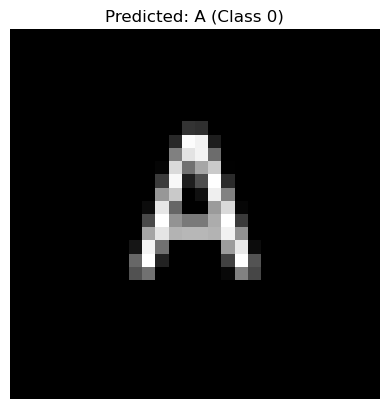

In [48]:
plt.imshow(original_img, cmap='gray')
plt.title(f"Predicted: {predicted_letter} (Class {prediction})")
plt.axis('off')
plt.show()

# Using CNN

# Letter P

In [49]:
import joblib

model = joblib.load('/content/cnn_az_handwritten.joblib')

FileNotFoundError: [Errno 2] No such file or directory: '/content/cnn_az_handwritten.joblib'

In [51]:
def preprocess_image_for_cnn(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = 255 - img_array
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array, np.squeeze(img_array)

input_img, display_img = preprocess_image_for_cnn('logo.jpg')

In [52]:
prediction = model.predict(input_img)
predicted_class = np.argmax(prediction)
predicted_letter = word_dict.get(predicted_class, "Unknown")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


In [53]:
print(f"Predicted Letter: {predicted_letter} (Class {predicted_class})")
print("\nTop 5 Predictions:")
top5_indices = np.argsort(prediction[0])[::-1][:5]
for idx in top5_indices:
    letter = word_dict.get(idx, "?")
    prob = prediction[0][idx]
    print(f"  {letter} (Class {idx}): {prob:.4f}")

Predicted Letter: P (Class 15)

Top 5 Predictions:
  P (Class 15): 1.0000
  B (Class 1): 0.0000
  Q (Class 16): 0.0000
  R (Class 17): 0.0000
  A (Class 0): 0.0000


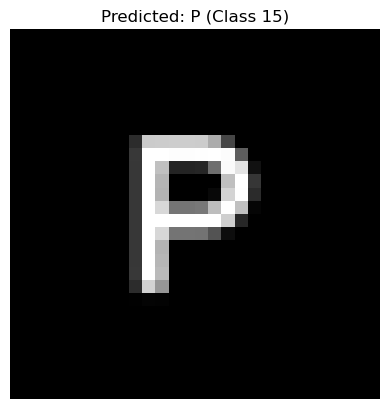

In [55]:
plt.imshow(display_img, cmap='gray')
plt.title(f"Predicted: {predicted_letter} (Class {predicted_class})")
plt.axis('off')
plt.show()

# Letter M

In [56]:
input_img, display_img = preprocess_image_for_cnn('letter M.jpg')
prediction = model.predict(input_img)
predicted_class = np.argmax(prediction)
predicted_letter = word_dict.get(predicted_class, "Unknown")

print(f"Predicted Letter: {predicted_letter} (Class {predicted_class})")
print("\nTop 5 Predictions:")
top5_indices = np.argsort(prediction[0])[::-1][:5]
for idx in top5_indices:
    letter = word_dict.get(idx, "?")
    prob = prediction[0][idx]
    print(f"  {letter} (Class {idx}): {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Letter: M (Class 12)

Top 5 Predictions:
  M (Class 12): 0.8879
  N (Class 13): 0.1119
  W (Class 22): 0.0002
  H (Class 7): 0.0001
  U (Class 20): 0.0000


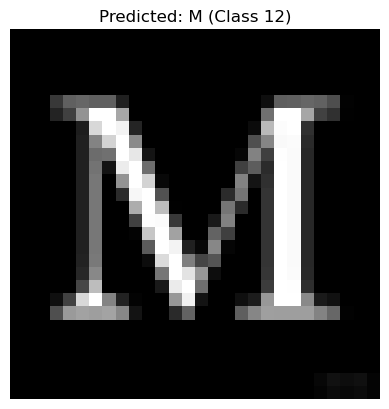

In [57]:
plt.imshow(display_img, cmap='gray')
plt.title(f"Predicted: {predicted_letter} (Class {predicted_class})")
plt.axis('off')
plt.show()